In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

url = 'customer_analysis.csv'
df = pd.read_csv(url, delimiter= '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [4]:
df.dropna(subset=['Income'], inplace=True)

missing_values = df.isnull().sum()

In [5]:
# Convert the 'Dt_Customer' column to a datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1292\2250859781.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_1292\2250859781.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_1292\2250859781.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_1292\2250859781.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df[

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Calculate the age of the customer today
df["Age"] = 2021 - df["Year_Birth"]

# Calculate total spending on various items
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Derive living situation by marital status
df["Living_With"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"})

# Calculate the total number of children in the household
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Calculate family size
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]

# Create a feature indicating parenthood
df["Is_Parent"] = np.where(df["Children"] > 0, 1, 0)

# Segment education levels
df["Education"] = df["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

# Rename spending attributes for clarity
df = df.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})

# Drop redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [7]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,40,422,Partner,1,3,1


In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Education' and 'Living_With' columns
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])

In [9]:
from sklearn.preprocessing import StandardScaler

# Creating a subset of the DataFrame by dropping specific features
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

# Scaling the remaining numerical features
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_df)

PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1", "col2", "col3"])

PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-5.691396e-17,2.848682,-5.843091,-2.497235,-0.800306,2.398025,7.347915
col2,2216.0,4.228467e-17,1.691218,-4.246288,-1.317268,-0.139396,1.228176,6.083143
col3,2216.0,-3.056119e-18,1.154383,-2.955438,-0.899055,-0.124553,0.809264,3.785636


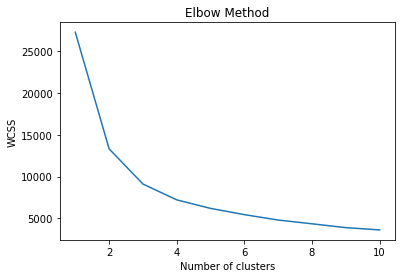

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(PCA_df)  # Use PCA_ds or your data after dimensionality reduction
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters using your reduced dataset (PCA_ds)
yhat_AC = AC.fit_predict(PCA_df)

# Add the 'Clusters' feature to your original DataFrame (data)
df["Clusters"] = yhat_AC

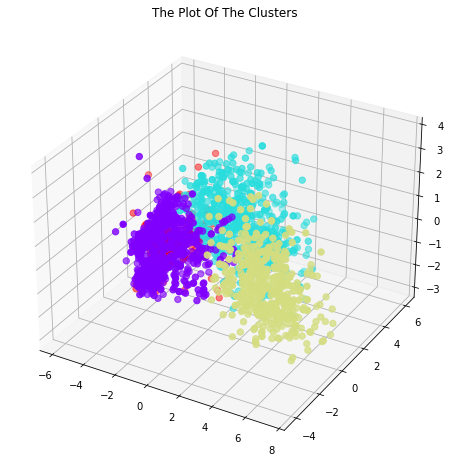

In [17]:
from sklearn.cluster import AgglomerativeClustering
x = PCA_df['col1']
y = PCA_df['col2']
z = PCA_df['col3']

AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC

df["Clusters"] = yhat_AC

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap='rainbow')
ax.set_title("The Plot Of The Clusters")
plt.show()

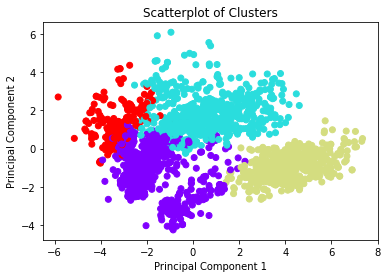

In [18]:
#Cluster Chart using Scatterplot
plt.scatter(PCA_df['col1'], PCA_df['col2'], c=PCA_df['Clusters'], cmap='rainbow')
plt.title('Scatterplot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

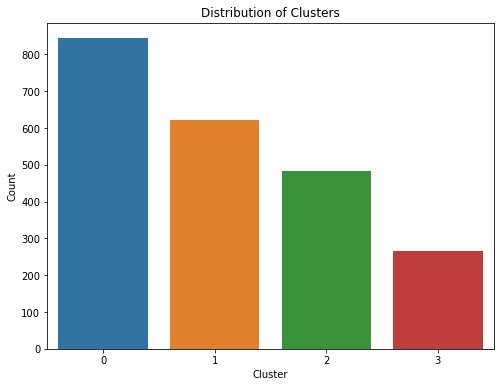

In [20]:
#Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Clusters', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

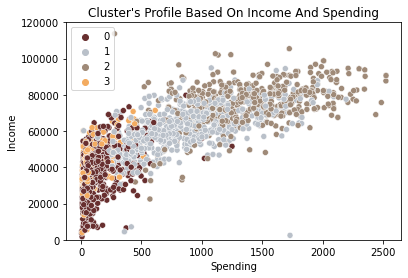

In [22]:
custom_palette = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
scatter_plot = sns.scatterplot(data=df, x="Spent", y="Income", hue="Clusters", palette=custom_palette)
plt.ylim(0, 120000)
plt.xlabel('Spending')
plt.ylabel('Income')
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


In [ ]:
# Group 0: Customers with average spending and average income.
# Group 1: Customers with high spending and high income.
# Group 2: Customers with low spending and low income.
# Group 3: Customers with low spending and low income.
#Within the dataset, it is evident that Group 1, consisting of customers with high spending and high income, is the dominant category.